___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Decision Trees and Random Forests in Python

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [113]:
df = pd.read_csv('kyphosis.csv')

In [114]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


##### Kyphosis: A factor with levels absent present indicating if a kyphosis was present after the operation.
##### Age: In months.
##### Number: The number of vertebrae involved.
##### Start: The number of the first vertebra operated on.

## EDA

We'll just check out a simple pairplot for this small dataset.

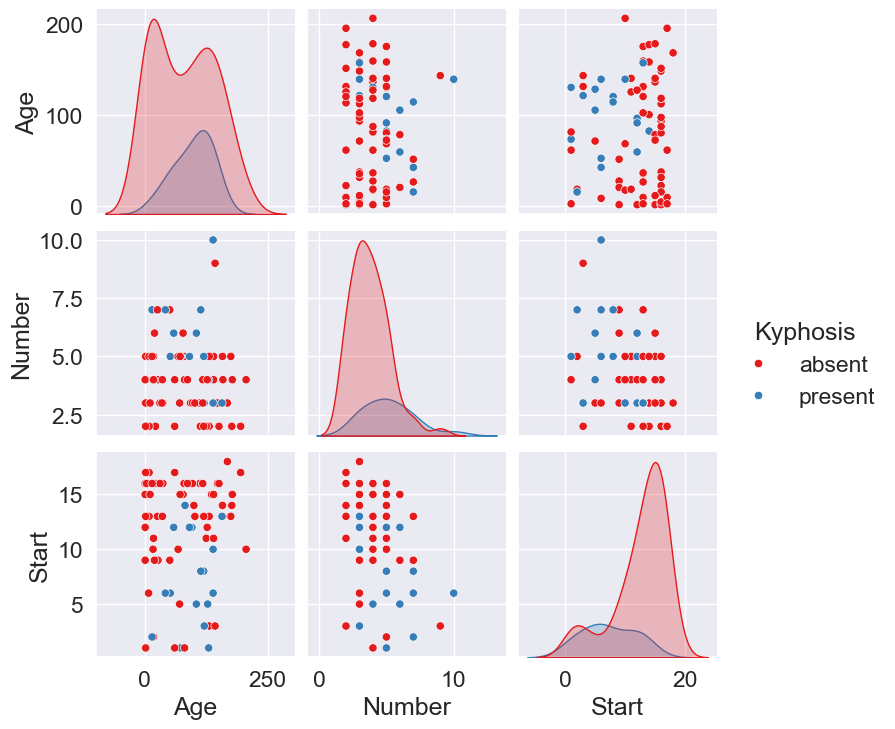

In [115]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

C:\Users\sudar\AppData\Local\Temp\ipykernel_14476\3862175050.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Number)


<Axes: xlabel='Number', ylabel='Density'>

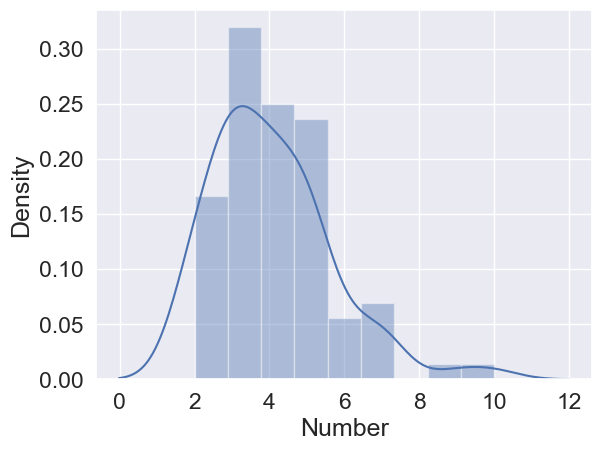

In [116]:
sns.distplot(df.Number)

## What is the percentage distribution of kyphosis cases?

C:\Users\sudar\AppData\Local\Temp\ipykernel_14476\2519324116.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Kyphosis', palette=['skyblue', 'lightpink'])


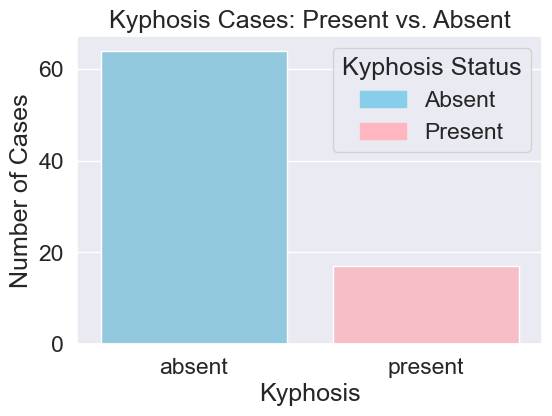

In [117]:
import matplotlib.patches as mpatches

#plt.style.use('dark_background')

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Kyphosis', palette=['skyblue', 'lightpink'])
plt.title('Kyphosis Cases: Present vs. Absent')
plt.xlabel('Kyphosis')
plt.ylabel('Number of Cases')
# Create custom legend
absent_patch = mpatches.Patch(color='skyblue', label='Absent')
present_patch = mpatches.Patch(color='lightpink', label='Present')
plt.legend(handles=[absent_patch, present_patch], title='Kyphosis Status', loc='upper right')


# Display the plot
plt.show()

<Axes: xlabel='Number', ylabel='count'>

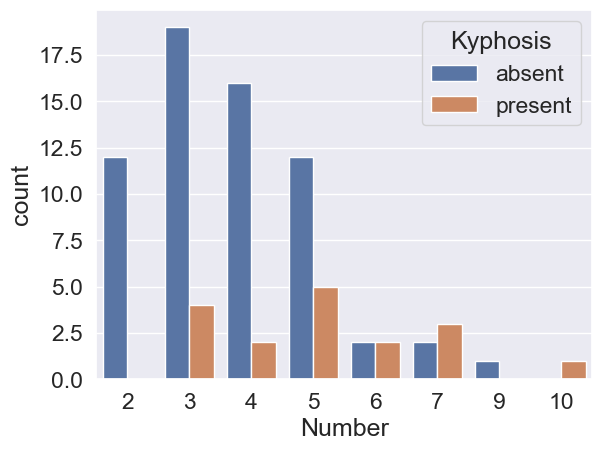

In [118]:
sns.countplot(data = df, x = 'Number', hue = 'Kyphosis')


## Train Test Split

Let's split up the data into a training set and a test set!

In [119]:
from sklearn.model_selection import train_test_split


In [120]:
df['Kyphosis'] = df['Kyphosis'].map({'absent': 0, 'present': 1})

In [121]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [123]:
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [124]:
y

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int64

In [125]:
y_test

60    1
20    0
12    0
9     1
52    1
21    1
61    1
28    0
64    0
33    0
59    0
14    0
46    0
42    0
16    0
62    0
44    0
43    0
26    0
54    0
50    0
77    0
13    0
17    0
27    0
Name: Kyphosis, dtype: int64

In [14]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

# # Apply the scaler to the features
# normalized_features = scaler.fit_transform(X)

# # Convert the normalized features back to a DataFrame
# normalized_data = pd.DataFrame(normalized_features, columns=X.columns)

# # Add the target column back to the DataFrame
# normalized_data['Kyphosis'] = df['Kyphosis']

# # Display the first few rows of the normalized dataset
# print(normalized_data.head())

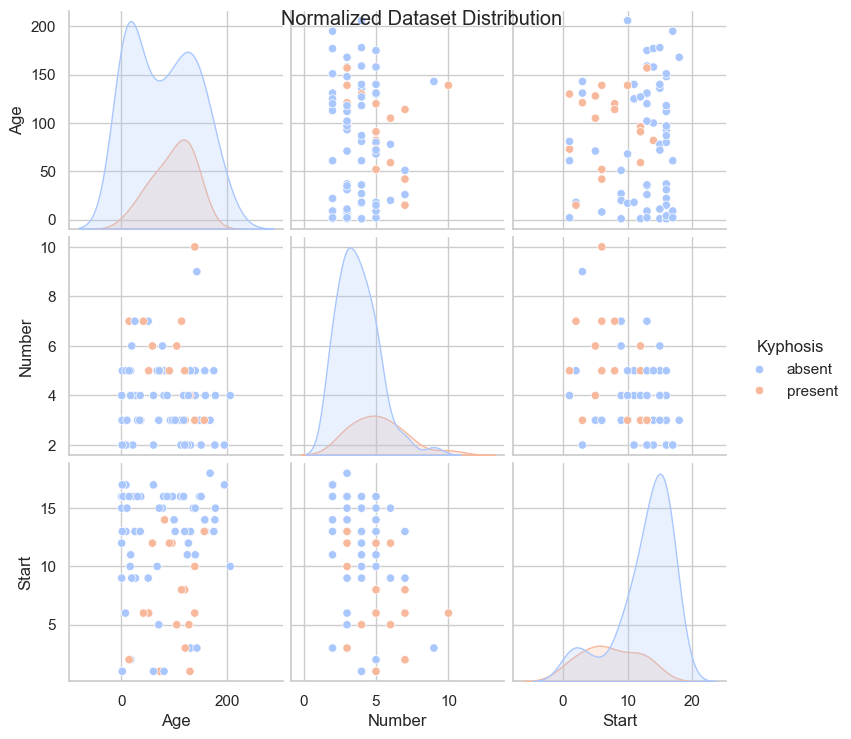

In [15]:
sns.set(style="whitegrid")

# Create a pairplot of the normalized data
pair_plot = sns.pairplot(df, hue='Kyphosis', palette='coolwarm')

# Set the title for the plot
pair_plot.fig.suptitle("Normalized Dataset Distribution")

# Show the plot
plt.show()

In [15]:
df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [16]:
y

0      absent
1      absent
2     present
3      absent
4      absent
       ...   
76    present
77     absent
78     absent
79    present
80     absent
Name: Kyphosis, Length: 81, dtype: object

In [111]:
# df['Kyphosis'] = df['Kyphosis'].map({'absent': 0, 'present': 1})

In [89]:
df

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [16]:
print(y[:5])

0     absent
1     absent
2    present
3     absent
4     absent
Name: Kyphosis, dtype: object


In [17]:
# Correlation Matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

ValueError: could not convert string to float: 'absent'

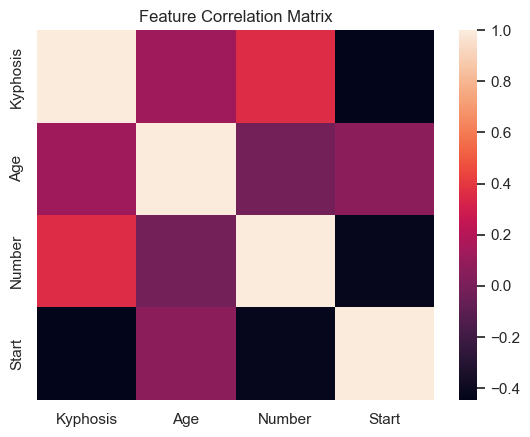

In [57]:
sns.heatmap(correlation_matrix)

# Set the title for the plot
plt.title('Feature Correlation Matrix')

# Show the plot
plt.show()

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [20]:
models={"Logistic Regression": LogisticRegression(),
        "Random Forest": RandomForestClassifier(),
        "Decision Tree ":DecisionTreeClassifier(),
        "K-Neighbors" : KNeighborsClassifier()
        }

# Create a function to fit and score models
def fit_and_score(models,x_train,x_test,y_train,y_test):

    """"
    Fits and evaluates given ML models.
    models: a dict of different sci-kit ml models
    x_train: training features
    x_test: testing data
    y_train :  training labels
    y_test: test lables

    """ 
# Set random seed
    np.random.seed(4)
# Make a dictionary to keep model scores
    model_scores={}

# Loop through models

    for name,model in models.items():
    #Fit model
        model.fit(x_train,y_train)
    #Predict on test data
        model_scores[name]=model.score(x_test , y_test)
    return model_scores

In [21]:
model_scores=fit_and_score(models=models,
                           x_train=X_train,
                           x_test=X_test,
                           y_train=y_train,
                           y_test=y_test)

print(model_scores)

{'Logistic Regression': 0.8, 'Random Forest': 0.92, 'Decision Tree ': 0.8, 'K-Neighbors': 0.76}


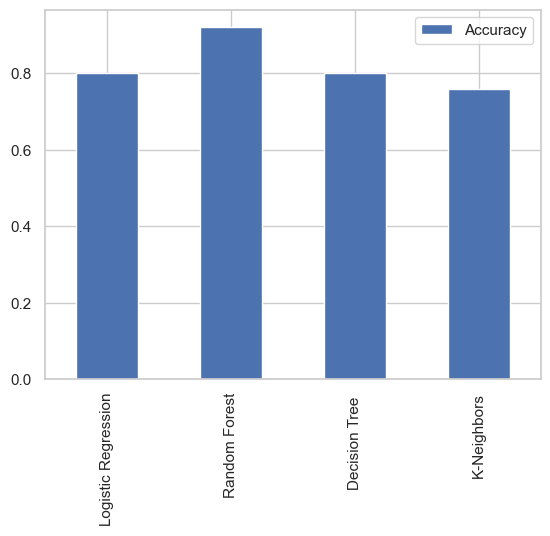

In [22]:
model_compare=pd.DataFrame(model_scores,index=['Accuracy'])
model_compare.T.plot.bar();

In [23]:
from sklearn.metrics import classification_report,confusion_matrix,recall_score,f1_score

# Logistic Regression

In [24]:
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [25]:
log_pred =log.predict(X_test)

In [26]:
log_score = log.score(X_test,y_test)
log_score

0.8

In [27]:
print(confusion_matrix(y_test,log_pred))

[[16  3]
 [ 2  4]]


In [28]:
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

      absent       0.89      0.84      0.86        19
     present       0.57      0.67      0.62         6

    accuracy                           0.80        25
   macro avg       0.73      0.75      0.74        25
weighted avg       0.81      0.80      0.80        25



In [29]:
log_recall = recall_score(y_test, log_pred)
# log_f1 = f1_score(y_test, log_pred)
# print(f'Recall: {log_recall}')
# print(f'F1 Score: {log_f1}')

ValueError: pos_label=1 is not a valid label. It should be one of ['absent', 'present']

### Hyperparameter Tuning

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
log = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
log_grid = GridSearchCV(estimator=log, param_grid=grid, n_jobs=-1, cv=15, scoring='accuracy',error_score=0)
log_grid.fit(X, y)

GridSearchCV(cv=15, error_score=0, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [32]:
log_grid.score(X_test,y_test)

0.88

In [33]:
log_grid.best_params_

{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

In [34]:
log_pred_grid = log_grid.predict(X_test)
log_cm_grid=confusion_matrix(y_test,log_pred_grid)
log_cm_grid

array([[18,  1],
       [ 2,  4]], dtype=int64)

In [35]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                   annot=True,
                   cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

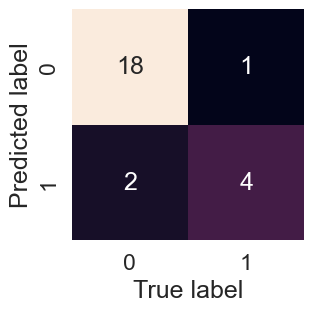

In [36]:

plot_conf_mat(y_test,log_pred_grid)

## Random Forests

In [126]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [127]:
rfc_pred = rfc.predict(X_test)

In [128]:
rfc_score=rfc.score(X_test,y_test)
rfc_score

0.8

In [129]:
rf_cm=confusion_matrix(y_test,rfc_pred)
rf_cm

array([[16,  4],
       [ 1,  4]], dtype=int64)

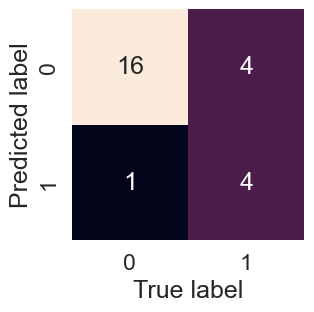

In [130]:
# # plt.figure(figsize=(10, 5))
# rf_cm=confusion_matrix(y_test,rfc_pred)
# rf_cm
# sns.heatmap(rf_cm, annot=True, fmt='d' )
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.title('Confusion Matrix')
# plt.show()
plot_conf_mat(y_test,rfc_pred)

In [131]:
print(classification_report(y_test,rfc_pred))


              precision    recall  f1-score   support

           0       0.94      0.80      0.86        20
           1       0.50      0.80      0.62         5

    accuracy                           0.80        25
   macro avg       0.72      0.80      0.74        25
weighted avg       0.85      0.80      0.81        25



### Hyperparameter Tuning

In [43]:
rf_grid_param={"n_estimators" : [100,200,500,1000],
             "max_depth":[None,3,5,10],
             
             "min_samples_split": [2,5,8,10],
             "min_samples_leaf": [2,5,8,10]
             }

In [44]:
np.random.seed(42)

rf_grid  = GridSearchCV(estimator=rfc,
                        param_grid=rf_grid_param,
                        cv=12,
                        verbose=2,
                        n_jobs=-1)
rf_grid.fit(X,y)

Fitting 12 folds for each of 256 candidates, totalling 3072 fits


GridSearchCV(cv=12, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5, 10],
                         'min_samples_leaf': [2, 5, 8, 10],
                         'min_samples_split': [2, 5, 8, 10],
                         'n_estimators': [100, 200, 500, 1000]},
             verbose=2)

In [45]:

rf_grid.score(X_test,y_test)

0.96

In [132]:
rf_grid_param2={"n_estimators" : [100],
             "max_depth":[5],
             
             "min_samples_split": [5],
             "min_samples_leaf": [2]
             }

In [133]:
np.random.seed(42)

rf_grid2  = GridSearchCV(estimator=rfc,
                        param_grid=rf_grid_param2,
                        cv=2,
                        verbose=2,
                        n_jobs=-1)
rf_grid2.fit(X,y)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5], 'min_samples_leaf': [2],
                         'min_samples_split': [5], 'n_estimators': [100]},
             verbose=2)

In [94]:
rf_grid2.score(X_test,y_test)

0.96

In [134]:
rfc_pred_grid = rf_grid2.predict(X_test)

In [135]:
print(classification_report(y_test,rfc_pred_grid))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        20
           1       0.83      1.00      0.91         5

    accuracy                           0.96        25
   macro avg       0.92      0.97      0.94        25
weighted avg       0.97      0.96      0.96        25



In [51]:

rf_cm_grid=confusion_matrix(y_test,rfc_pred)
rf_cm_grid

array([[18,  1],
       [ 1,  5]], dtype=int64)

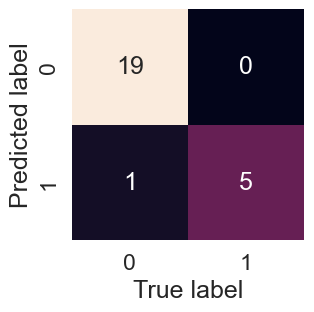

In [52]:
plot_conf_mat(y_test,rfc_pred_grid)

In [53]:
rf_grid.best_params_

{'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 100}

In [58]:
rf_pred = rf_grid.predict(X_test)

# Decision Tree

In [59]:
dtree= DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [60]:
dtree_pred = rfc.predict(X_test)

In [61]:
print(dtree.score(X_test,y_test))

0.8


In [62]:
print(confusion_matrix(y_test,dtree_pred))

[[18  1]
 [ 1  5]]


In [63]:
print(classification_report(y_test,dtree_pred))

              precision    recall  f1-score   support

      absent       0.95      0.95      0.95        19
     present       0.83      0.83      0.83         6

    accuracy                           0.92        25
   macro avg       0.89      0.89      0.89        25
weighted avg       0.92      0.92      0.92        25



In [64]:
dtree_score = dtree.score(X_test,y_test)
dtree_score

0.8

### Hyperparameter Tuning

In [65]:
dtree_grid_param = {
    # 'criterion': ['gini', 'entropy'],
    'max_depth': [None,1,3,5,10],
    "min_samples_split": [2,5,8,10,12,14],
    "min_samples_leaf": [2,5,8,10],
    # 'max_features': [None,'sqrt','log2']
}

In [66]:
dtree_grid = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), 
                           param_grid=dtree_grid_param, 
                           cv=3, 
                           scoring='accuracy')

# Fit the grid search to the training data
dtree_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [None, 1, 3, 5, 10],
                         'min_samples_leaf': [2, 5, 8, 10],
                         'min_samples_split': [2, 5, 8, 10, 12, 14]},
             scoring='accuracy')

In [67]:
dtree_grid.score(X_test,y_test)

0.88

In [68]:
dtree_grid.best_params_

{'max_depth': None, 'min_samples_leaf': 8, 'min_samples_split': 2}

In [69]:
dtree_pred_grid = dtree_grid.predict(X_test)

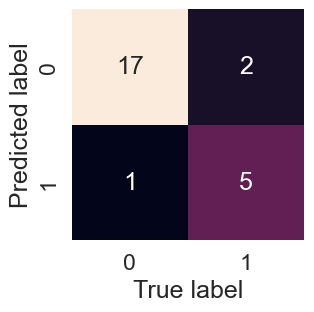

In [70]:
plot_conf_mat(y_test,dtree_pred_grid)

# K-Neighbors

In [71]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)

KNeighborsClassifier()

In [72]:
knc_score=knc.score(X_test,y_test)
knc_score

0.76

In [73]:
knc_pred=knc.predict(X_test)

In [74]:
print(confusion_matrix(y_test,knc_pred))

[[19  0]
 [ 6  0]]


In [75]:
print(classification_report(y_test,knc_pred))

              precision    recall  f1-score   support

      absent       0.76      1.00      0.86        19
     present       0.00      0.00      0.00         6

    accuracy                           0.76        25
   macro avg       0.38      0.50      0.43        25
weighted avg       0.58      0.76      0.66        25



c:\Users\sudar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sudar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\sudar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

### Hyperparameter Tuning

In [76]:
knc_grid_param = {
    'n_neighbors': [1,2,3,4,5],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [1,2,3,4,5],
    # 'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

In [77]:
knc_grid = GridSearchCV(estimator=KNeighborsClassifier(), 
                           param_grid=knc_grid_param, 
                           cv=6, 
                           scoring='accuracy')

# Fit the grid search to the training data
knc_grid.fit(X_train, y_train)

GridSearchCV(cv=6, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [1, 2, 3, 4, 5],
                         'n_neighbors': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [78]:
knc_grid.score(X_test,y_test)

0.8

In [79]:
knc_grid.best_params_

{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 3, 'weights': 'uniform'}

In [80]:
knc_grid_pred = knc_grid.predict(X_test)

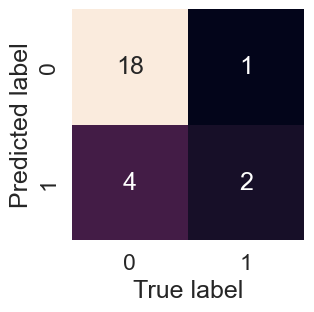

In [81]:
plot_conf_mat(y_test,knc_grid_pred)

## Model Comparision after hyperparameter tuning



In [82]:
models_hyp={"Logistic Regression": LogisticRegression(C= 10, penalty= 'l2', solver= 'liblinear'),
        "Random Forest": RandomForestClassifier(n_estimators=[100],
                                                max_depth=[5],
                                                min_samples_split= [5],
                                                min_samples_leaf= [2]),
        "Decision Tree ":DecisionTreeClassifier(max_depth= None,
                                                 min_samples_leaf= 2,
                                                 min_samples_split= 2),
        "K-Neighbors" : KNeighborsClassifier(algorithm= 'auto',
                                             leaf_size= 1, 
                                             n_neighbors= 5,
                                            weights='uniform')
        }

# Create a function to fit and score models
def fit_and_score(models,x_train,x_test,y_train,y_test):

    """"
    Fits and evaluates given ML models.
    models: a dict of different sci-kit ml models
    x_train: training features
    x_test: testing data
    y_train :  training labels
    y_test: test lables

    """ 
# Set random seed
    np.random.seed(4)
# Make a dictionary to keep model scores
    model_scores={}

# Loop through models

    for name,model in models.items():
    #Fit model
        model.fit(x_train,y_train)
    #Predict on test data
        model_scores[name]=model.score(x_test , y_test)
    return model_scores

In [83]:
model_scores_hyp=fit_and_score(models=models,
                           x_train=X_train,
                           x_test=X_test,
                           y_train=y_train,
                           y_test=y_test)

print(model_scores_hyp)

{'Logistic Regression': 0.8, 'Random Forest': 0.92, 'Decision Tree ': 0.8, 'K-Neighbors': 0.76}


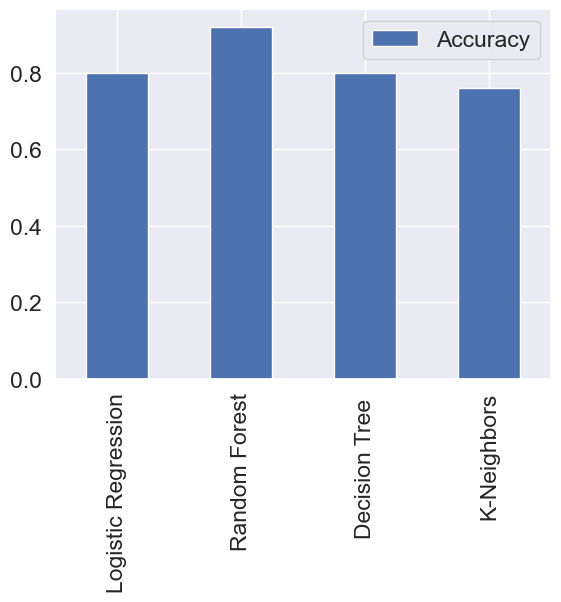

In [84]:
model_compare_hyp=pd.DataFrame(model_scores_hyp,index=['Accuracy'])
model_compare_hyp.T.plot.bar();

In [136]:
from sklearn.metrics import roc_auc_score,roc_curve

In [137]:
fpr, tpr, thresholds = roc_curve(y_test, rfc_pred_grid, pos_label='present')
roc_auc = roc_auc_score(y_test, rfc_pred_grid)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

c:\Users\sudar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:769: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  y_true = y_true == pos_label


TypeError: 'bool' object is not subscriptable

In [99]:
y_test

75     absent
34     absent
52    present
48    present
31     absent
78     absent
47     absent
6      absent
13     absent
80     absent
21    present
10    present
35     absent
64     absent
57    present
62     absent
63     absent
4      absent
3      absent
5      absent
23     absent
30     absent
8      absent
70     absent
60    present
Name: Kyphosis, dtype: object